<a href="https://colab.research.google.com/github/Bravebreeze/220803314/blob/main/%D0%9B%D0%B0%D0%B1%D0%B0_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

In [ ]:
np.random.seed(0)

In [ ]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

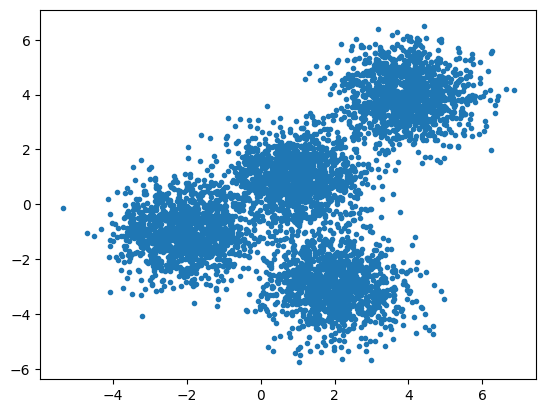

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [ ]:
k_means = KMeans(init = 'k-means++', n_clusters = 4, n_init = 12)

In [ ]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [ ]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 2, 2, ..., 0, 1, 1], dtype=int32)

In [ ]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 3.97334234,  3.98758687],
       [-2.03556986, -0.99814034],
       [ 1.99876902, -3.01796355],
       [ 0.96900523,  0.98370298]])

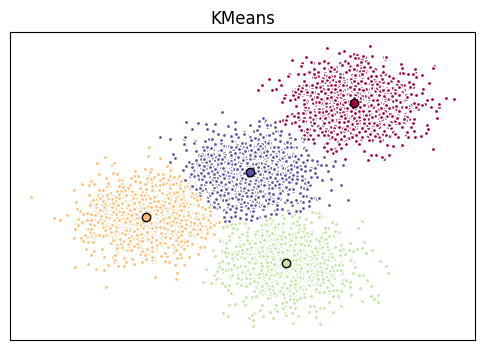

In [ ]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a colormap, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):
    # Create a list of all data points, where the data points that are
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the data points with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')

    # Plots the centroids with specified color, but with a darker outline.
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


In [ ]:
import pandas as pd

cust_df = pd.read_csv("Cust_Segmentation.csv")
print(cust_df.head())

   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2  


In [ ]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [ ]:
clusterNum=3
k_means=KMeans(init="k-means++",n_clusters=clusterNum,n_init=12)
k_means.fit(X)
labels=k_means.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

In [ ]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [ ]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


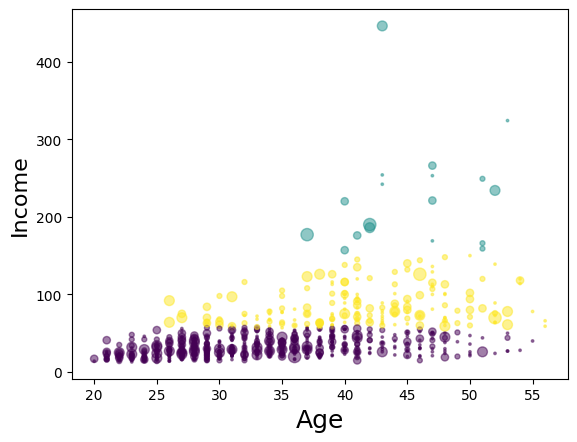

In [ ]:
area = np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

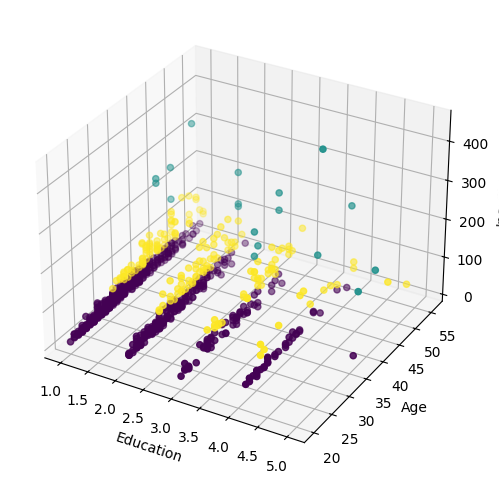

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = fig.add_subplot(111, projection='3d')
plt.cla()
#plt.ylabel﴾'Age',fontsize=18﴿
#plt.xlabel﴾'Income',fontsize=16﴿
#plt.zlabel﴾'Education',fontsize=16﴿
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(float))
plt.show()